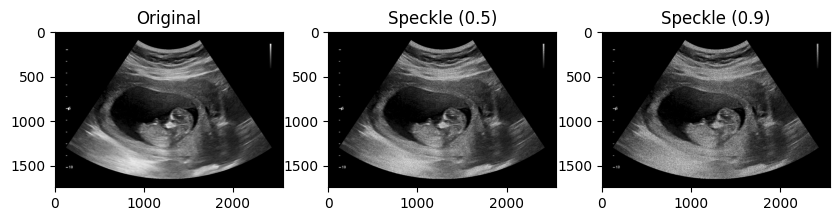

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("ultrasoundimg.jpg", cv2.IMREAD_GRAYSCALE)

# Function to add Speckle Noise
def add_noise(image, intensity=0.2):
    noise = np.random.randn(*image.shape) * intensity
    noisy_image = image + image * noise  # Multiplicative Noise
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

# Apply different intensities
speckle_1 = add_noise(image, 0.5)
speckle_2 = add_noise(image, 0.9)

# Show images
plt.figure(figsize=(10,5))
plt.subplot(1,3,1), plt.imshow(image, cmap='gray'), plt.title("Original")
plt.subplot(1,3,2), plt.imshow(speckle_1, cmap='gray'), plt.title("Speckle (0.5)")
plt.subplot(1,3,3), plt.imshow(speckle_2, cmap='gray'), plt.title("Speckle (0.9)")
plt.show()


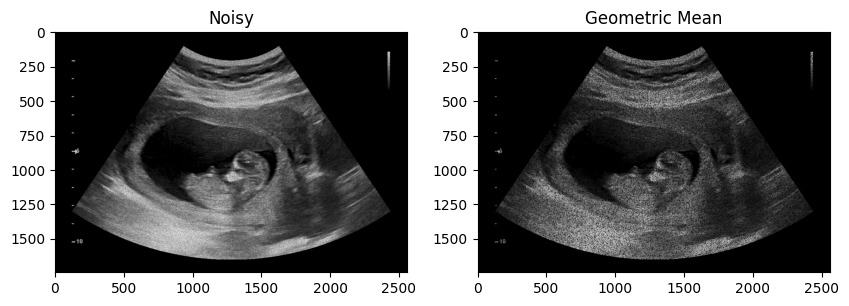

In [2]:
#Geometric mean filter 
#Using OpenCV (Built-in)
from scipy.ndimage import generic_filter

#geometric mean filter
def geometric_mean_filter(image, kernel_size=3):
    def geo_mean(arr):
        product = np.prod(arr)
        return product ** (1.0 / len(arr))
    
    return generic_filter(image, geo_mean, size=kernel_size)

geo_filtered = geometric_mean_filter(speckle_1)

# Show results
plt.figure(figsize=(10,4))
plt.subplot(1,2,1), plt.imshow(speckle_1, cmap='gray'), plt.title("Noisy")
plt.subplot(1,2,2), plt.imshow(geo_filtered, cmap='gray'), plt.title("Geometric Mean")
plt.show()


In [4]:
#Using User-defined Function
def custom_geo_mean_filter(image, kernel_size=3):
    padded = cv2.copyMakeBorder(image, kernel_size//2, kernel_size//2, kernel_size//2, kernel_size//2, cv2.BORDER_REPLICATE)
    filtered = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded[i:i+kernel_size, j:j+kernel_size]
            product = np.prod(region)
            filtered[i, j] = product ** (1.0 / (kernel_size**2))

    return np.clip(filtered, 0, 255).astype(np.uint8)

geo_filtered_custom = custom_geo_mean_filter(speckle_1)


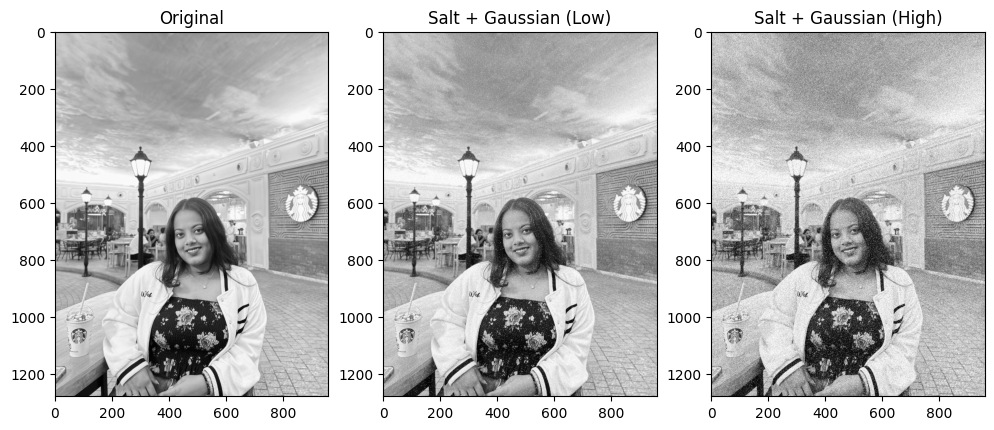

In [7]:
#3. ADDING SALT AND GAUSSIAN NOISE
# Load Image (Grayscale)
image = cv2.imread("mansi.jpg", cv2.IMREAD_GRAYSCALE)

# Function to add Salt and Gaussian Noise
def add_salt_and_gaussian_noise(image, salt_prob=0.02, gauss_std=20):
    noisy = image.copy()
    
    # Salt Noise
    num_salt = int(salt_prob * image.size)
    coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    noisy[coords[0], coords[1]] = 255  # Add salt (white pixels)
    
    # Gaussian Noise
    gauss = np.random.normal(0, gauss_std, image.shape)  
    noisy = noisy + gauss  # Add Gaussian noise
    
    return np.clip(noisy, 0, 255).astype(np.uint8)  
# Apply noise with different intensities
noisy_image_1 = add_salt_and_gaussian_noise(image, salt_prob=0.02, gauss_std=10)
noisy_image_2 = add_salt_and_gaussian_noise(image, salt_prob=0.05, gauss_std=30)

# Display images
plt.figure(figsize=(12,5))
plt.subplot(1,3,1), plt.imshow(image, cmap='gray'), plt.title("Original")
plt.subplot(1,3,2), plt.imshow(noisy_image_1, cmap='gray'), plt.title("Salt + Gaussian (Low)")
plt.subplot(1,3,3), plt.imshow(noisy_image_2, cmap='gray'), plt.title("Salt + Gaussian (High)")
plt.show()


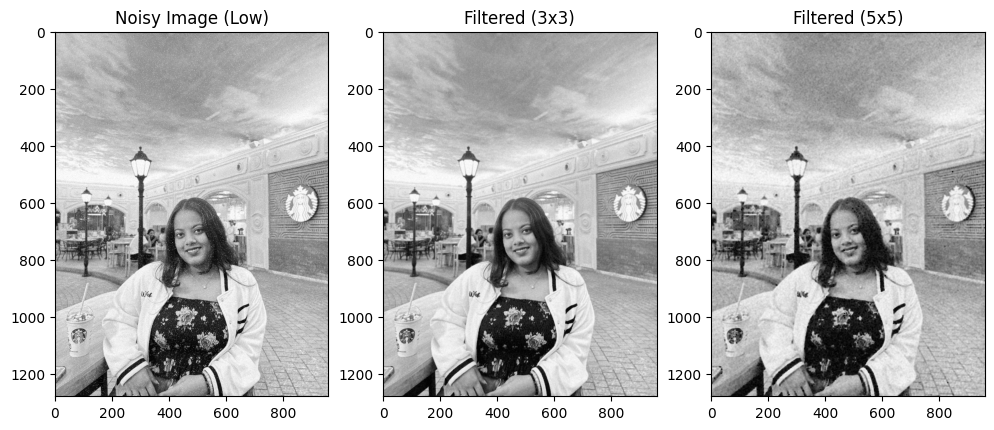

In [8]:
from scipy.ndimage import generic_filter

# Built-in harmonic mean filter
def harmonic_mean_filter(image, kernel_size=3):
    def harmonic_mean(arr):
        arr = arr[arr > 0]  # Avoid division by zero
        return len(arr) / np.sum(1.0 / arr) if len(arr) > 0 else 0
    
    return generic_filter(image, harmonic_mean, size=kernel_size)

# Apply the filter
harmonic_filtered_1 = harmonic_mean_filter(noisy_image_1, kernel_size=3)
harmonic_filtered_2 = harmonic_mean_filter(noisy_image_2, kernel_size=5)

# Display results
plt.figure(figsize=(12,5))
plt.subplot(1,3,1), plt.imshow(noisy_image_1, cmap='gray'), plt.title("Noisy Image (Low)")
plt.subplot(1,3,2), plt.imshow(harmonic_filtered_1, cmap='gray'), plt.title("Filtered (3x3)")
plt.subplot(1,3,3), plt.imshow(harmonic_filtered_2, cmap='gray'), plt.title("Filtered (5x5)")
plt.show()


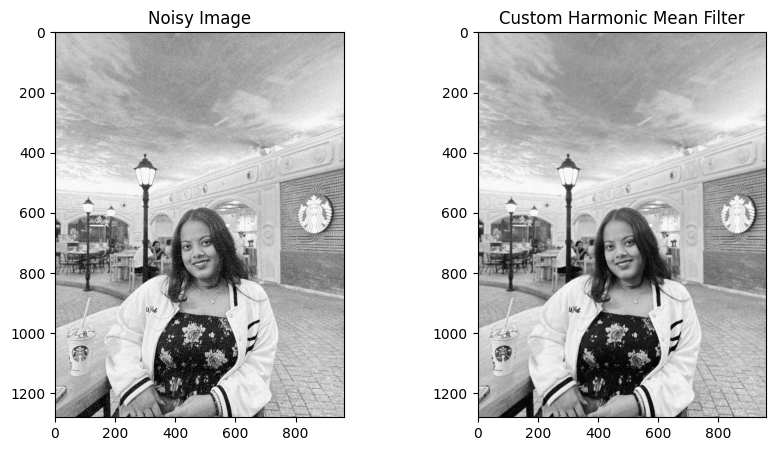

In [9]:
#User-defined Harmonic Mean Filter
def custom_harmonic_mean_filter(image, kernel_size=3):
    padded = cv2.copyMakeBorder(image, kernel_size//2, kernel_size//2, kernel_size//2, kernel_size//2, cv2.BORDER_REPLICATE)
    filtered = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded[i:i+kernel_size, j:j+kernel_size]
            nonzero = region[region > 0]  # Avoid division by zero
            filtered[i, j] = (kernel_size**2) / np.sum(1.0 / nonzero) if len(nonzero) > 0 else 0

    return np.clip(filtered, 0, 255).astype(np.uint8)

# Apply the custom filter
harmonic_filtered_custom = custom_harmonic_mean_filter(noisy_image_1, kernel_size=3)

# Display results
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(noisy_image_1, cmap='gray'), plt.title("Noisy Image")
plt.subplot(1,2,2), plt.imshow(harmonic_filtered_custom, cmap='gray'), plt.title("Custom Harmonic Mean Filter")
plt.show() 


<function matplotlib.pyplot.show(close=None, block=None)>

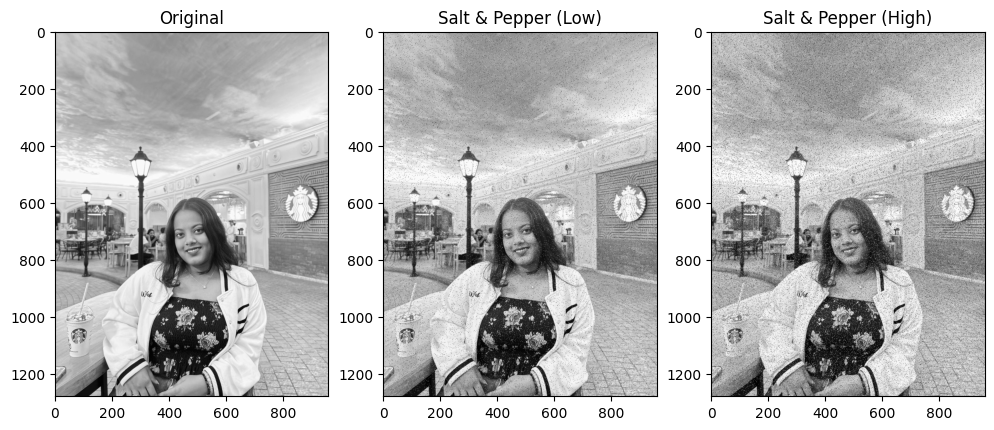

In [12]:
 # QUE5] Load Image (Grayscale)
image = cv2.imread("mansi.jpg", cv2.IMREAD_GRAYSCALE)

# Function to add Salt-and-Pepper Noise
def add_salt_and_pepper_noise(image, salt_prob=0.02, pepper_prob=0.02):
    noisy = image.copy()
    
    # Add Salt (White pixels)
    num_salt = int(salt_prob * image.size)
    coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    noisy[coords[0], coords[1]] = 255  # Salt (white)

    # Add Pepper (Black pixels)
    num_pepper = int(pepper_prob * image.size)
    coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
    noisy[coords[0], coords[1]] = 0  # Pepper (black)

    return noisy

# Apply noise with different intensities
noisy_image_1 = add_salt_and_pepper_noise(image, salt_prob=0.02, pepper_prob=0.02)
noisy_image_2 = add_salt_and_pepper_noise(image, salt_prob=0.05, pepper_prob=0.05)

# Display images
plt.figure(figsize=(12,5))
plt.subplot(1,3,1), plt.imshow(image, cmap='gray'), plt.title("Original")
plt.subplot(1,3,2), plt.imshow(noisy_image_1, cmap='gray'), plt.title("Salt & Pepper (Low)")
plt.subplot(1,3,3), plt.imshow(noisy_image_2, cmap='gray'), plt.title("Salt & Pepper (High)")
plt.show 


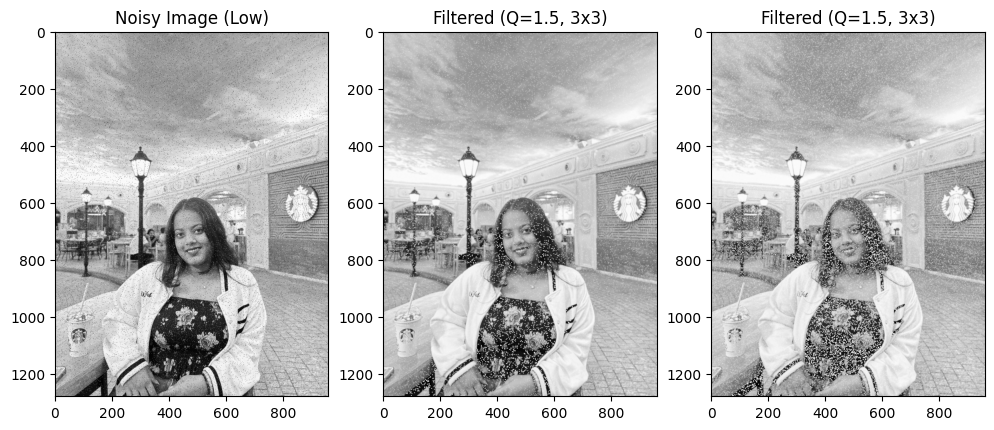

In [13]:
# QUE6] 
from scipy.ndimage import generic_filter

# Built-in Contra-Harmonic Mean Filter
def contra_harmonic_mean_filter(image, kernel_size=3, Q=1.5):
    def contra_harmonic_mean(arr):
        numerator = np.sum(arr ** (Q + 1))
        denominator = np.sum(arr ** Q) + 1e-5  # Avoid division by zero
        return numerator / denominator

    return generic_filter(image.astype(float), contra_harmonic_mean, size=kernel_size).astype(np.uint8)

# Apply the filter
filtered_image_1 = contra_harmonic_mean_filter(noisy_image_1, kernel_size=3, Q=1.5)
filtered_image_2 = contra_harmonic_mean_filter(noisy_image_2, kernel_size=3, Q=1.5)

# Display results
plt.figure(figsize=(12,5))
plt.subplot(1,3,1), plt.imshow(noisy_image_1, cmap='gray'), plt.title("Noisy Image (Low)")
plt.subplot(1,3,2), plt.imshow(filtered_image_1, cmap='gray'), plt.title("Filtered (Q=1.5, 3x3)")
plt.subplot(1,3,3), plt.imshow(filtered_image_2, cmap='gray'), plt.title("Filtered (Q=1.5, 3x3)")
plt.show()


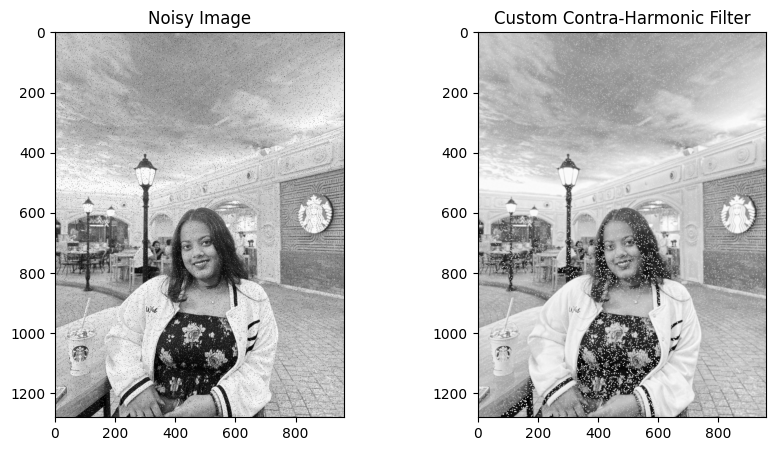

In [14]:
# QUE6] User-defined Contra-Harmonic Mean Filter
def custom_contra_harmonic_mean_filter(image, kernel_size=3, Q=1.5):
    padded = cv2.copyMakeBorder(image, kernel_size//2, kernel_size//2, kernel_size//2, kernel_size//2, cv2.BORDER_REPLICATE)
    filtered = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded[i:i+kernel_size, j:j+kernel_size].astype(float)
            num = np.sum(region ** (Q + 1))
            denom = np.sum(region ** Q) + 1e-5  # Avoid division by zero
            filtered[i, j] = num / denom

    return np.clip(filtered, 0, 255).astype(np.uint8)

# Apply the custom filter
filtered_custom = custom_contra_harmonic_mean_filter(noisy_image_1, kernel_size=3, Q=1.5)

# Display results
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(noisy_image_1, cmap='gray'), plt.title("Noisy Image")
plt.subplot(1,2,2), plt.imshow(filtered_custom, cmap='gray'), plt.title("Custom Contra-Harmonic Filter")
plt.show()
